In [12]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a href="https://colab.research.google.com/github/google-research/language-table/blob/main/language_table/examples/language_table_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Run In Google Colab"/></a>
  </td>
</table>


# Install Dependencies


In [13]:
# !pip install git+https://github.com/google-research/language-table.git
# !pip install mediapy
# !pip install matplotlib==3.1.3

# Import Modules


In [14]:
import os

from language_table.environments import blocks
from language_table.environments import language_table
from language_table.environments.rewards import block2block

from matplotlib import pyplot as plt
import mediapy
import numpy as np

import tensorflow_datasets as tfds

# Language Table Environment

The Language Table sim environment contains many different configurations for different tasks.

## Block Modes

- BLOCK_8: 8 blocks on the board: red moon, red pentagon, blue moon, blue cube, green cube, green star, yellow star, and yellow pentagon.
- BLOCK_4: 4 blocks on the board: red moon, blue cube, green star, and yellow pentagon.
- N_CHOOSE_K: Number of blocks on the board varies (total of 12 possible blocks).

## Rewards

| Reward                             | Description                                                |
| ---------------------------------- | ---------------------------------------------------------- |
| BlockToBlockReward                 | Move a block to another block.                             |
| BlockToAbsoluteLocationReward      | Move a block to a specific absolute location on the board. |
| BlockToRelativeLocationReward      | Move a block to a direction relative to itself.            |
| BlockToBlockRelativeLocationReward | Move a block to the particular side of another block.      |
| SeparateBlocksReward               | Separate 2 blocks.                                         |
| PlayReward                         | Freeform play, no particular goal.                         |


In [15]:
def decode_inst(inst):
    """Utility to decode encoded language instruction"""
    return bytes(inst[np.where(inst != 0)].tolist()).decode("utf-8")


# Create an example with the BlockToBlockReward
reward_factory = block2block.BlockToBlockReward  # CHANGEME: change to another reward.

env = language_table.LanguageTable(
    block_mode=blocks.LanguageTableBlockVariants.BLOCK_8,
    reward_factory=reward_factory,
    seed=0,
)
obs = env.reset()

argv[0]=


Show the RGB image and print the instruction.


put the green star close to the green cube


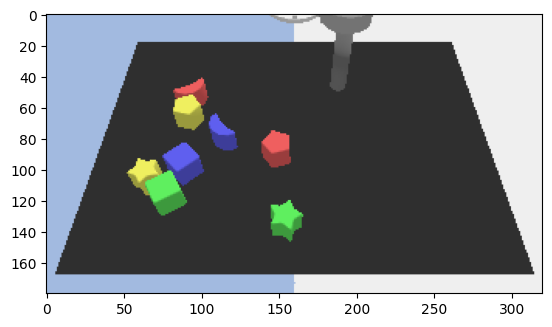

In [16]:
plt.imshow(obs["rgb"])
print(decode_inst(obs["instruction"]))

Calling env.render() also gives you the RGB image with the text rendered above. To turn off rendering the text, pass `render_text_in_image=False` in the environment constructor.


In [17]:
obs.keys()

odict_keys(['effector_translation', 'effector_target_translation', 'instruction', 'rgb'])

In [18]:
obs["instruction"].shape

(512,)

In [19]:
obs["effector_target_translation"]

array([0.24746539, 0.07497831], dtype=float32)

In [20]:
obs["effector_translation"]

array([0.2479806 , 0.07523021], dtype=float32)

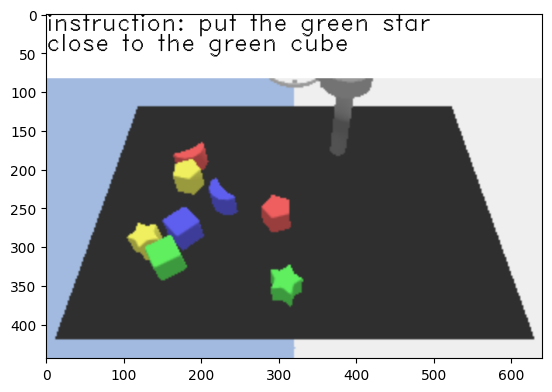

In [21]:
plt.imshow(env.render())

Simple example of stepping the environment.


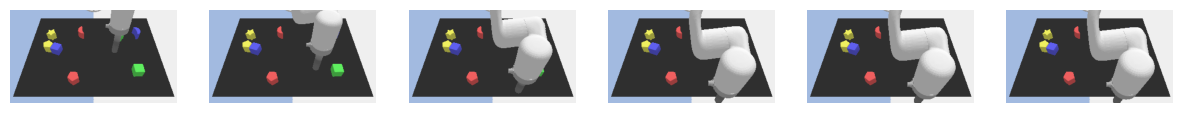

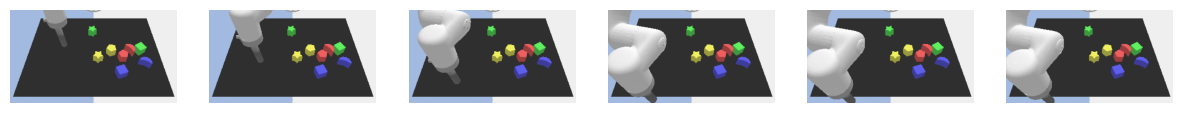

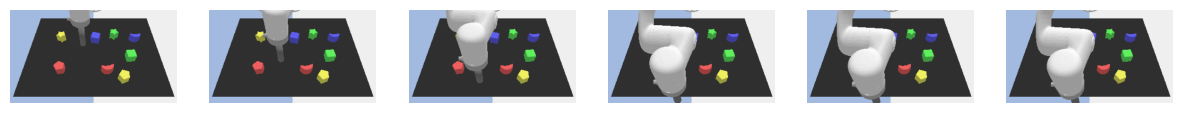

In [23]:
for _ in range(3):
    obs = env.reset()
    fig, axes = plt.subplots(1, 6, figsize=(15, 5))
    for ax in axes:
        ax.set_axis_off()
        ax.imshow(obs["rgb"])
        obs, _, _, _ = env.step(np.array([0.1, 0]))
    plt.show()

# Language Table Datasets

See [full details]((https://github.com/google-research/language-table#datasets) on the variants of Language Table Datasets here.

Here is a quick overview:

| Dataset                                        | Real/sim | Controlled by | Language-labeled by | # episodes |
| ---------------------------------------------- | -------- | ------------- | ------------------- | ---------: |
| language_table                                 | real     | human         | human               |    442,226 |
| language_table_sim                             | sim      | human         | human               |    181,020 |
| language_table_blocktoblock_sim                | sim      | human         | scripted            |      8,000 |
| language_table_blocktoblock_4block_sim         | sim      | human         | scripted            |      8,298 |
| language_table_blocktoblock_oracle_sim         | sim      | oracle        | scripted            |    200,000 |
| language_table_blocktoblockrelative_oracle_sim | sim      | oracle        | scripted            |    200,000 |
| language_table_blocktoabsolute_oracle_sim      | sim      | oracle        | scripted            |    200,000 |
| language_table_blocktorelative_oracle_sim      | sim      | oracle        | scripted            |    200,000 |
| language_table_separate_oracle_sim             | sim      | oracle        | scripted            |    200,000 |

See the [RLDS Tutorial](https://colab.research.google.com/github/google-research/rlds/blob/main/rlds/examples/rlds_tutorial.ipynb) for more details on the RLDS data format.


In [24]:
DATASET_VERSION = "0.0.1"
DATASET_NAME = "language_table"  # CHANGEME: change this to load another dataset.

dataset_directories = {
    "language_table": "gs://gresearch/robotics/language_table",
    "language_table_sim": "gs://gresearch/robotics/language_table_sim",
    "language_table_blocktoblock_sim": "gs://gresearch/robotics/language_table_blocktoblock_sim",
    "language_table_blocktoblock_4block_sim": "gs://gresearch/robotics/language_table_blocktoblock_4block_sim",
    "language_table_blocktoblock_oracle_sim": "gs://gresearch/robotics/language_table_blocktoblock_oracle_sim",
    "language_table_blocktoblockrelative_oracle_sim": "gs://gresearch/robotics/language_table_blocktoblockrelative_oracle_sim",
    "language_table_blocktoabsolute_oracle_sim": "gs://gresearch/robotics/language_table_blocktoabsolute_oracle_sim",
    "language_table_blocktorelative_oracle_sim": "gs://gresearch/robotics/language_table_blocktorelative_oracle_sim",
    "language_table_separate_oracle_sim": "gs://gresearch/robotics/language_table_separate_oracle_sim",
}

In [25]:
dataset_path = os.path.join(dataset_directories[DATASET_NAME], DATASET_VERSION)
builder = tfds.builder_from_directory(dataset_path)
episode_ds = builder.as_dataset(split="train")

print(episode_ds.element_spec)

2024-05-27 17:26:02.110771: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


{'episode_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'steps': DatasetSpec({'action': TensorSpec(shape=(2,), dtype=tf.float32, name=None), 'is_first': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_last': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_terminal': TensorSpec(shape=(), dtype=tf.bool, name=None), 'observation': {'effector_target_translation': TensorSpec(shape=(2,), dtype=tf.float32, name=None), 'effector_translation': TensorSpec(shape=(2,), dtype=tf.float32, name=None), 'instruction': TensorSpec(shape=(512,), dtype=tf.int32, name=None), 'rgb': TensorSpec(shape=(360, 640, 3), dtype=tf.uint8, name=None)}, 'reward': TensorSpec(shape=(), dtype=tf.float32, name=None)}, TensorShape([]))}


2024-05-27 17:26:05.494622: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-27 17:26:05.495846: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [26]:
dataset_path

'gs://gresearch/robotics/language_table/0.0.1'

## Loading Episodes

Take the first episode in the dataset, and make a video from the frames


In [28]:
episode = next(iter(episode_ds.take(1)))

frames = []
for step in episode["steps"].as_numpy_iterator():
    frames.append(step["observation"]["rgb"])

mediapy.show_video(frames, title=decode_inst(step["observation"]["instruction"]), fps=5)

2024-05-27 17:36:36.265215: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Loading Steps

Take the first 100 steps of the dataset, and make a combined video of the frames


In [29]:
steps_ds = episode_ds.flat_map(
    lambda x: x["steps"]
)  # get the dataset as individual steps

# Make the first 100 steps of the dataset into a video.
frames = []
for step in steps_ds.take(100).as_numpy_iterator():
    frames.append(step["observation"]["rgb"])

mediapy.show_video(frames, fps=5)

2024-05-27 17:41:27.358490: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
